## <center>PYTHON-14. Очистка данных 9. Итоги

Имеются две базы данных (*https://lms.skillfactory.ru/assets/courseware/v1/958d35ff25f2486f65613da4459e6647/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/Data_TSUM.xlsx*)(два листа Excel-файла): база с ценами конкурентов (Data_Parsing) и внутренняя база компании (Data_Company).

В базе парсинга есть два id, однозначно определяющие товар: producer_id и producer_color.

В базе компании есть два аналогичных поля: item_id и color_id.

Нам известно, что коды в двух базах отличаются наличием набора служебных символов. В базе парсинга встречаются следующие символы: _, -, ~, \\, /.
                            
**Необходимо:**

* Считать данные из Excel в DataFrame (Data_Parsing) и (Data_Company).
* Подтянуть к базе парсинга данные из базы компании (item_id, color_id, current_price) и сформировать столбец разницы цен в % (цена конкурента к нашей цене).
* Определить сильные отклонения от среднего в разности цен в пределах бренда-категории (то есть убрать случайные выбросы, сильно искажающие сравнение). Критерий — по вкусу, написать комментарий в коде.
* Записать новый файл Excel с базой парсинга, приклееными к ней столбцами из пункта 2 и с учётом пункта 3 (можно добавить столбец outlier и проставить Yes для выбросов).

In [1]:
import pandas as pd
import numpy as np
# установим библиотек plotly.express - она нужна для визуализации
import plotly.express as px

# Установить openpyxl через терминал, если не установлен и выдает ошибку:    pip install openpyxl

# загружаем лист №1 Data_Parsing (из файла Data_TSUM.xlsx) в одноименный DataFrame
Data_Parsing = pd.read_excel('data/Data_TSUM.xlsx', engine='openpyxl', sheet_name='Data_Parsing')
# загружаем лист №2 Data_Company (из файла Data_TSUM.xlsx) в одноименный DataFrame
Data_Company = pd.read_excel('data/Data_TSUM.xlsx', engine='openpyxl', sheet_name='Data_Company')

# проверим, что все загрузили правильно
display(Data_Parsing)
display(Data_Company)

,brand,Category,producer_id,producer_color,price
0,Valentino,Shoes,aaaaa1111_11,black,167
1,Valentino,Shoes,aaaaa1111_12,black,188
2,Valentino,Shoes,aaaaa1111_13,black,184
3,Valentino,Shoes,aaaaa1111_14,bla//ck,196
4,Valentino,Shoes,aaaaa1111_15,bla\\ck,250
...,...,...,...,...,...
70,Stone Island,Bags,sssss1111_31,~~~red,164
71,Stone Island,Bags,sssss1111_32,~~~red,158
72,Stone Island,Bags,sssss1111_33,~~~red,194
73,Stone Island,Bags,sssss1111_34,~~~red,256


,brand,Category,item_id,color_id,current price
0,Valentino,Shoes,aaaaa111111,black,247
1,Valentino,Shoes,aaaaa111112,black,161
2,Valentino,Shoes,aaaaa111113,black,234
3,Valentino,Shoes,aaaaa111114,black,167
4,Valentino,Shoes,aaaaa111115,black,153
...,...,...,...,...,...
70,Stone Island,Bags,sssss111131,red,165
71,Stone Island,Bags,sssss111132,red,196
72,Stone Island,Bags,sssss111133,red,236
73,Stone Island,Bags,sssss111134,red,222


**Выводы из представленных таблиц:**

* Просмотрев первые 5 и последние 5 сторок таблиц, можно заметить, что строчки таблиц соответствуют друг другу, кроме признака Цены.
* Признак *item_id* соответствует признаку *producer_id*, однако в последнем имеются служебные символы
* Признак *color_id* соответствует признаку *producer_color*, однако в последнем также имеются служебные символы
                                          
**Алгоритм объединения таблиц:**

* В принципе, можно не заморачиваясь, объединить таблицы по индексам, добавив нужные столбцы
* Можно заморочиться и сначала очистить столбцы *producer_id* и *producer_color* от служебных символов и уже потом объединить столбцы - этим и займемся

In [2]:
import re # импортируем необходимый модуль для коррекции даных
# правим в Data_Parsing значения признаков producer_id, producer_color, очищая их от служебных символов
Data_Parsing['producer_id'] = Data_Parsing['producer_id'].apply(lambda x: re.sub('[^A-Za-z0-9]', '', x))
Data_Parsing['producer_color'] = Data_Parsing['producer_color'].apply(lambda x: re.sub('[^A-Za-z0-9]', '', x))

# display(Data_Parsing) # проверим, что все получилось как мы планировали

# объединяем таблицы по признаку producer_id/item_id, добавляя необходимые столбцы
Data_Parsing = Data_Parsing.merge(
    Data_Company[['item_id','color_id','current price']],
    left_on='producer_id',
    right_on='item_id'
)
display(Data_Parsing) # проверим, что все правильно


,brand,Category,producer_id,producer_color,price,item_id,color_id,current price
0,Valentino,Shoes,aaaaa111111,black,167,aaaaa111111,black,247
1,Valentino,Shoes,aaaaa111112,black,188,aaaaa111112,black,161
2,Valentino,Shoes,aaaaa111113,black,184,aaaaa111113,black,234
3,Valentino,Shoes,aaaaa111114,black,196,aaaaa111114,black,167
4,Valentino,Shoes,aaaaa111115,black,250,aaaaa111115,black,153
...,...,...,...,...,...,...,...,...
70,Stone Island,Bags,sssss111131,red,164,sssss111131,red,165
71,Stone Island,Bags,sssss111132,red,158,sssss111132,red,196
72,Stone Island,Bags,sssss111133,red,194,sssss111133,red,236
73,Stone Island,Bags,sssss111134,red,256,sssss111134,red,222


In [3]:
# создаем новый столбец разницы цен в % (цена конкурента к нашей цене)
Data_Parsing['price_difference'] = (Data_Parsing['price'] / Data_Parsing['current price']) * 100

display(Data_Parsing) # проверяем, что все получилось

,brand,Category,producer_id,producer_color,price,item_id,color_id,current price,price_difference
0,Valentino,Shoes,aaaaa111111,black,167,aaaaa111111,black,247,67.611336
1,Valentino,Shoes,aaaaa111112,black,188,aaaaa111112,black,161,116.770186
2,Valentino,Shoes,aaaaa111113,black,184,aaaaa111113,black,234,78.632479
3,Valentino,Shoes,aaaaa111114,black,196,aaaaa111114,black,167,117.365269
4,Valentino,Shoes,aaaaa111115,black,250,aaaaa111115,black,153,163.398693
...,...,...,...,...,...,...,...,...,...
70,Stone Island,Bags,sssss111131,red,164,sssss111131,red,165,99.393939
71,Stone Island,Bags,sssss111132,red,158,sssss111132,red,196,80.612245
72,Stone Island,Bags,sssss111133,red,194,sssss111133,red,236,82.203390
73,Stone Island,Bags,sssss111134,red,256,sssss111134,red,222,115.315315


**Выводы по итоговой таблице:**

* в новой таблице значения признака *producer_id* идентичны значениям признака *item_id*
* в новой таблице значения признака *producer_color* идентичны значениям признака *color_id*
                          
В принципе, дублирующие столбцы можно удалить, однако такой задачи поставлено не было, поэтому оставляем.

Попробуем провести разведывательный анализ.

In [7]:
# построим коробку с усами где рассмотрим полученный признак 'price_difference'
# в разрезе по признаку 'вrand'
fig = px.box(Data_Parsing, x='price_difference', y='brand', color='brand',
             title='Распределение разницы в цене в % в разрезе по брендам',
             labels={'price_difference':'Разница в цене в % (признак price_difference) ',
                     'brand':'Бренды (признак brand) '
                     },
             height=500,width=1200
             ) 

fig.show()
fig.write_html("plotly/sobes_analiz1.html")
fig.write_image("plotly/sobes_analiz1.png")

# построим диаграмму рассеяния, где рассмотрим полученный признак 'price_difference'
# в разрезе по признаку 'вrand'
fig = px.scatter(Data_Parsing, x='price_difference', y='brand', color='brand', 
                 title="Распределение разницы в цене в % в разрезе по брендам",
                 labels={'price_difference':'Разница в цене в % (признак price_difference) ',
                         'brand':'Бренды (признак brand) '
                         },
                 height=500,width=1200
                 )

fig.show()
fig.write_html("plotly/sobes_analiz2.html")
fig.write_image("plotly/sobes_analiz2.png")

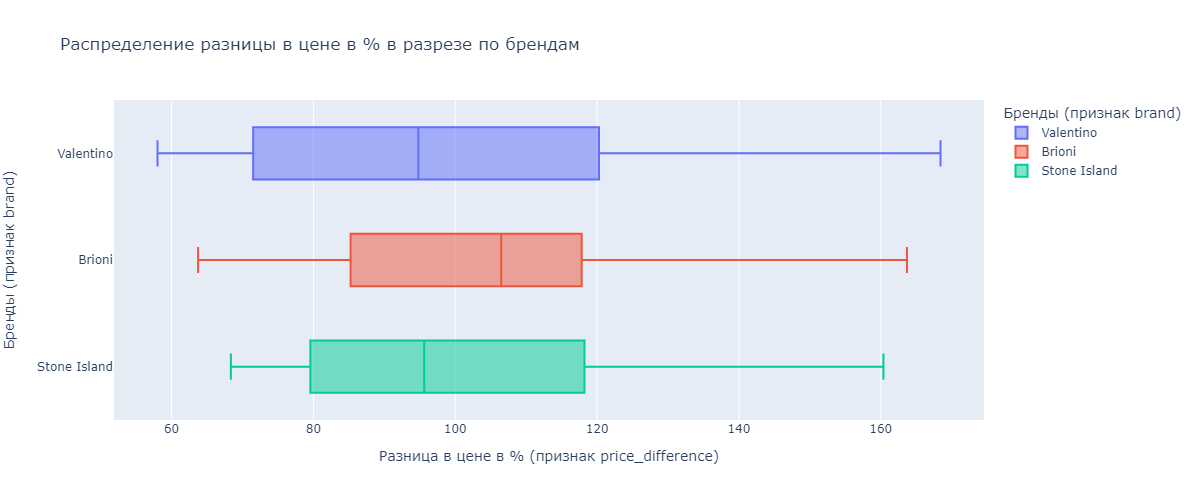

In [8]:
from IPython.display import Image
Image("plotly/sobes_analiz1.png")

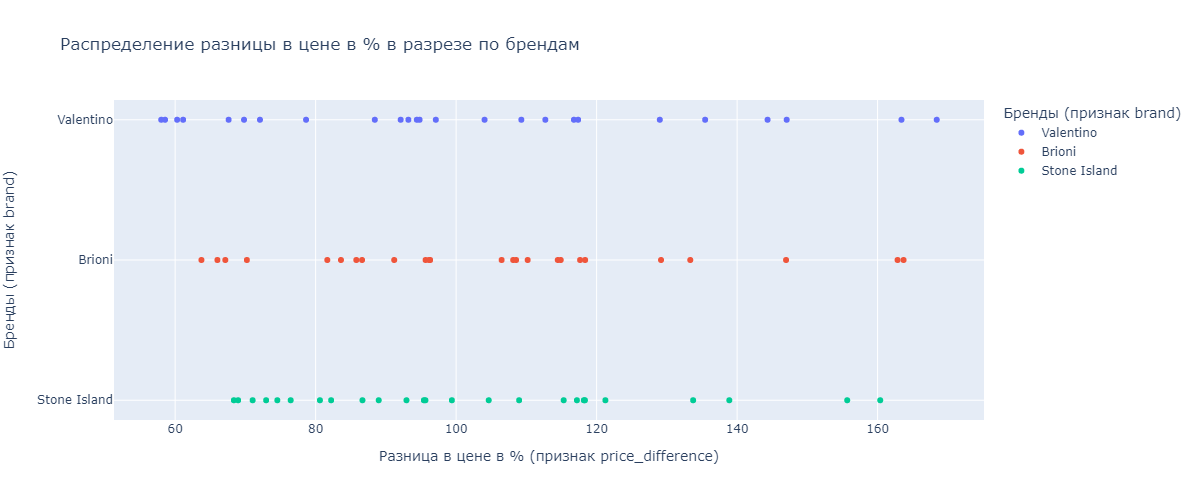

In [9]:
from IPython.display import Image
Image("plotly/sobes_analiz2.png")

**Выводы по графикам:**

* на верхнем графике отсутствуют аномальные выбросы; усы ящиков справа длиннеее, чем слева - вероятно, сильные отклонения будем искать справа.
* на нижнем графике чисто визуально можно предположить, что сильные оклонения - это 2 крайних значения справа по каждому бренду, т.е. суммарно будет 6 значений.

Однако, давайте проведем исследование на наличие выбросов, используя метод сигм (z-отклонения).

In [10]:
# воспользуемся функцией по поиску отклонений по методу сигм (z-отклонения)
def outliers_z_score(data, feature):
    
    x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - 3 * sigma # нижняя граница выставлена по стандартным значениям
    upper_bound = mu + 3 * sigma # верхняя граница выставлена по стандартным значениям
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x > lower_bound) & (x < upper_bound)]
    return outliers, cleaned

# создадим список, куда положим названия брендов
brand_list = list(Data_Parsing['brand'].value_counts().index)

# запустим цикл, в котором с каждой итерацией по бренду будем получать выбросы в признаке 'price_difference'
for brand_name in brand_list:

    mask = Data_Parsing['brand'] == brand_name
    outliers, cleaned = outliers_z_score(Data_Parsing[mask], 'price_difference')
    print(f'Число выбросов по методу z-отклонения в бренде {brand_name}: {outliers.shape[0]}')
    print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу z-отклонения в бренде Valentino: 0
Результирующее число записей: 25
Число выбросов по методу z-отклонения в бренде Brioni: 0
Результирующее число записей: 25
Число выбросов по методу z-отклонения в бренде Stone Island: 0
Результирующее число записей: 25


**Выводы:**
Выбросы отсутствуют. Попробуем уменьшить границы поиска.

In [11]:
# воспользуемся функцией по поиску отклонений по методу сигм (z-отклонения)
def outliers_z_score(data, feature):
    
    x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - 2 * sigma # уменьшаем нижнюю границу
    upper_bound = mu + 2 * sigma # уменьшаем верхнюю границу
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x > lower_bound) & (x < upper_bound)]
    return outliers, cleaned

# создадим список, куда положим названия брендов
brand_list = list(Data_Parsing['brand'].value_counts().index)

# запустим цикл, в котором с каждой итерацией по бренду будем получать выбросы в признаке 'price_difference'
for brand_name in brand_list:

    mask = Data_Parsing['brand'] == brand_name
    outliers, cleaned = outliers_z_score(Data_Parsing[mask], 'price_difference')
    print(f'Число выбросов по методу z-отклонения в бренде {brand_name}: {outliers.shape[0]}')
    print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу z-отклонения в бренде Valentino: 1
Результирующее число записей: 24
Число выбросов по методу z-отклонения в бренде Brioni: 2
Результирующее число записей: 23
Число выбросов по методу z-отклонения в бренде Stone Island: 2
Результирующее число записей: 23


**Выводы:**
Выбросы появились, их общее количество - 5, что не сильно отличается от нашего предположения при анализе диаграмм.

**Алгоритм дальнейших действий:**

* выявим полученные выбросы
* создадим новый признак *outlier*
* пометим в новом столбце выбросы значением 'yes'
* сохраним итоговую таблицу в файл согласно условиям задачи

In [12]:
# Окончательный код по выявлению отклонений

# воспользуемся функцией по поиску отклонений по методу сигм (z-отклонения)
def outliers_z_score(data, feature):
    
    x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - 2 * sigma # изменен стандартный параметр (почему - см.выше)
    upper_bound = mu + 2 * sigma # изменен стандартный параметр (почему - см.выше)
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x > lower_bound) & (x < upper_bound)]
    return outliers, cleaned

# создаем дополнительный признак 'outlier' и заполняем его по умолчанию значениями 'no'
Data_Parsing['outlier'] = 'no'

# создадим список, куда положим названия брендов
brand_list = list(Data_Parsing['brand'].value_counts().index)

# запустим цикл, в котором с каждой итерацией по бренду будем получать выбросы в признаке 'price_difference'
for brand_name in brand_list:

    mask = Data_Parsing['brand'] == brand_name
    outliers, cleaned = outliers_z_score(Data_Parsing[mask], 'price_difference')
    
    Data_Parsing.loc[outliers.index, 'outlier'] = 'yes' # помечаем выброс значением 'yes' в столбце 'outlier'
    
# проверим, что все выполнено правильно
display(Data_Parsing.info())
display(Data_Parsing['outlier'].value_counts())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75 entries, 0 to 74
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   brand             75 non-null     object 
 1   Category          75 non-null     object 
 2   producer_id       75 non-null     object 
 3   producer_color    75 non-null     object 
 4   price             75 non-null     int64  
 5   item_id           75 non-null     object 
 6   color_id          75 non-null     object 
 7   current price     75 non-null     int64  
 8   price_difference  75 non-null     float64
 9   outlier           75 non-null     object 
dtypes: float64(1), int64(2), object(7)
memory usage: 8.5+ KB


None

no     70
yes     5
Name: outlier, dtype: int64

In [13]:
# Дополнительно постороим еще одну диаграмму рассеяния
fig = px.scatter(Data_Parsing, x='price_difference', y='outlier', color='brand', 
                 title="Распределение разницы в цене в %",
                 labels={'price_difference':'Разница в цене в % (признак price_difference) ',
                         'brand':'Бренды (признак brand) '
                         },
                 height=500,width=1200
                 )

fig.show()
fig.write_html("plotly/sobes_vibrosi.html")
fig.write_image("plotly/sobes_vibrosi.png")

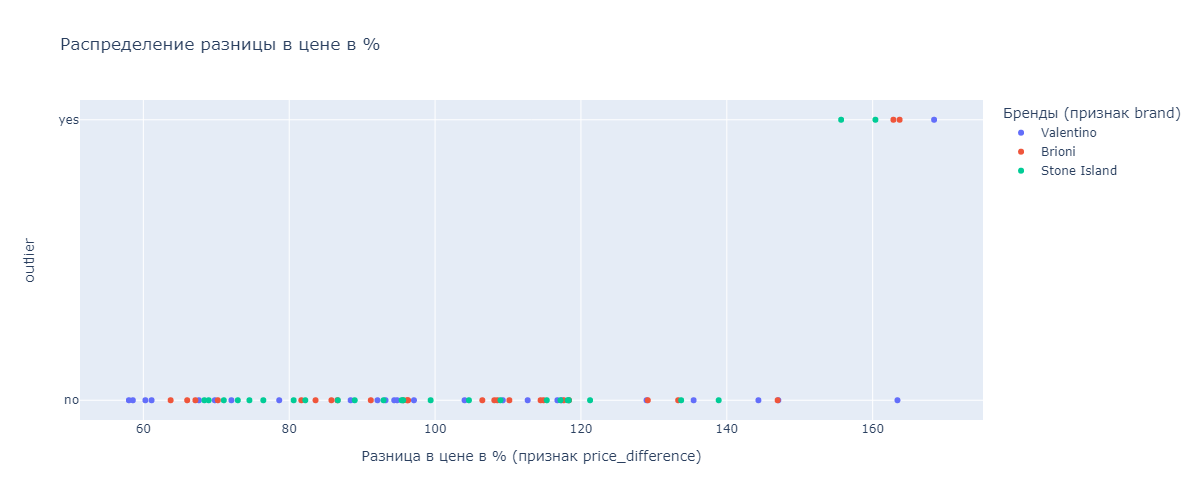

In [14]:
from IPython.display import Image
Image("plotly/sobes_vibrosi.png")

**Выводы про графику:**                              
На графике видно, что как мы и предполагали выбросами оказались 2 крайних значения справа в разрезе по брендам, правда в бренде Valentino выбросом оказалось только 1 значение.

In [15]:
# сохраняем итоговую таблицу в Excel-файл.
Data_Parsing.to_excel('data/Data_TSUM_result.xlsx', engine='openpyxl', sheet_name='Data_Parsing')
